In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error

#DiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

#SVMs
#from sklearn.l import LSTM
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from mpl_toolkits import mplot3d
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import(average_precision_score)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
# minMax_scale = MaxAbsScaler()   # to default range [0, 1]
# train = minMax_scale.fit_transform(train)
# test = minMax_scale.fit_transform(test)

In [2]:


from pandas import concat

# convert series to supervised learning by Jason Brownlee 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    #drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
MSFT
252
Epoch 1/50
14/14 - 3s - loss: 0.2641 - val_loss: 0.8148
Epoch 2/50
14/14 - 0s - loss: 0.1478 - val_loss: 0.5269
Epoch 3/50
14/14 - 0s - loss: 0.0939 - val_loss: 0.3029
Epoch 4/50
14/14 - 0s - loss: 0.0853 - val_loss: 0.1727
Epoch 5/50
14/14 - 0s - loss: 0.0743 - val_loss: 0.1113
Epoch 6/50
14/14 - 0s - loss: 0.0539 - val_loss: 0.0524
Epoch 7/50
14/14 - 0s - loss: 0.0315 - val_loss: 0.0256
Epoch 8/50
14/14 - 0s - loss: 0.0180 - val_loss: 0.0654
Epoch 9/50
14/14 - 0s - loss: 0.0194 - val_loss: 0.0679
Epoch 10/50
14/14 - 0s - loss: 0.0147 - val_loss: 0.0466
Epoch 11/50
14/14 - 0s - loss: 0.0153 - val_loss: 0.0398
Epoch 12/50
14/14 - 0s - loss: 0.0147 - val_loss: 0.0376
Epoch 13/50
14/14 - 0s - loss: 0.0142 - 

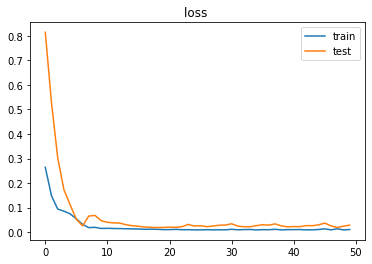

Test RMSE: 6.788


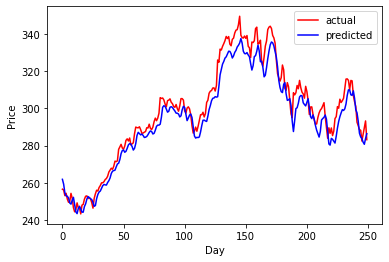

249
249


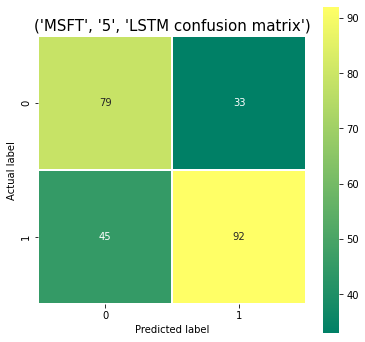

The accuracy of the model is: 68.67 %
The f1 value for the model is: 70.23 %
504
Epoch 1/50
28/28 - 2s - loss: 0.1448 - val_loss: 0.7440
Epoch 2/50
28/28 - 0s - loss: 0.1010 - val_loss: 0.4123
Epoch 3/50
28/28 - 0s - loss: 0.0744 - val_loss: 0.1205
Epoch 4/50
28/28 - 0s - loss: 0.0419 - val_loss: 0.1036
Epoch 5/50
28/28 - 0s - loss: 0.0124 - val_loss: 0.0243
Epoch 6/50
28/28 - 0s - loss: 0.0214 - val_loss: 0.0539
Epoch 7/50
28/28 - 0s - loss: 0.0310 - val_loss: 0.0660
Epoch 8/50
28/28 - 0s - loss: 0.0178 - val_loss: 0.0262
Epoch 9/50
28/28 - 0s - loss: 0.0102 - val_loss: 0.0557
Epoch 10/50
28/28 - 0s - loss: 0.0355 - val_loss: 0.0238
Epoch 11/50
28/28 - 0s - loss: 0.0274 - val_loss: 0.0462
Epoch 12/50
28/28 - 0s - loss: 0.0218 - val_loss: 0.0355
Epoch 13/50
28/28 - 0s - loss: 0.0115 - val_loss: 0.0459
Epoch 14/50
28/28 - 0s - loss: 0.0234 - val_loss: 0.0283
Epoch 15/50
28/28 - 0s - loss: 0.0243 - val_loss: 0.0251
Epoch 16/50
28/28 - 0s - loss: 0.0063 - val_loss: 0.0478
Epoch 17/50
28/2

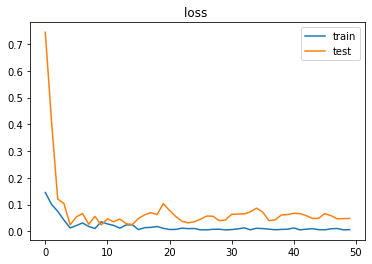

Test RMSE: 10.042


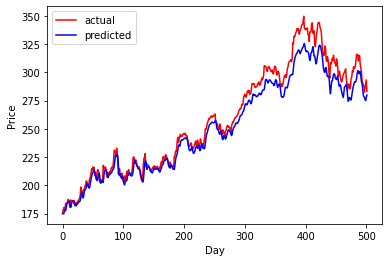

501
501


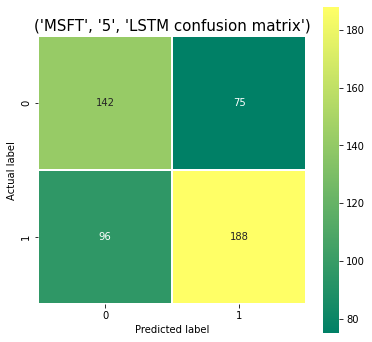

The accuracy of the model is: 65.87 %
The f1 value for the model is: 68.74 %
756
Epoch 1/50
42/42 - 2s - loss: 0.0395 - val_loss: 0.1775
Epoch 2/50
42/42 - 0s - loss: 0.1439 - val_loss: 0.3037
Epoch 3/50
42/42 - 0s - loss: 0.0436 - val_loss: 0.0578
Epoch 4/50
42/42 - 0s - loss: 0.0120 - val_loss: 0.0411
Epoch 5/50
42/42 - 0s - loss: 0.0351 - val_loss: 0.0472
Epoch 6/50
42/42 - 0s - loss: 0.0150 - val_loss: 0.0910
Epoch 7/50
42/42 - 0s - loss: 0.0394 - val_loss: 0.0561
Epoch 8/50
42/42 - 0s - loss: 0.0131 - val_loss: 0.1000
Epoch 9/50
42/42 - 0s - loss: 0.0235 - val_loss: 0.0949
Epoch 10/50
42/42 - 0s - loss: 0.0067 - val_loss: 0.0585
Epoch 11/50
42/42 - 0s - loss: 0.0048 - val_loss: 0.0538
Epoch 12/50
42/42 - 0s - loss: 0.0053 - val_loss: 0.0556
Epoch 13/50
42/42 - 0s - loss: 0.0051 - val_loss: 0.0533
Epoch 14/50
42/42 - 0s - loss: 0.0052 - val_loss: 0.0525
Epoch 15/50
42/42 - 0s - loss: 0.0052 - val_loss: 0.0538
Epoch 16/50
42/42 - 0s - loss: 0.0051 - val_loss: 0.0556
Epoch 17/50
42/4

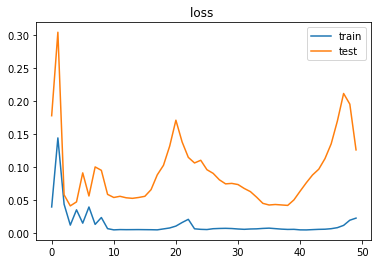

Test RMSE: 19.638


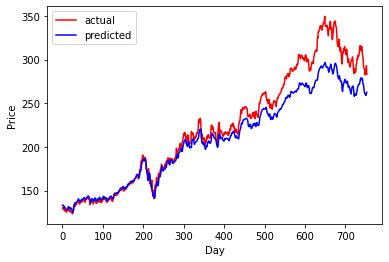

753
753


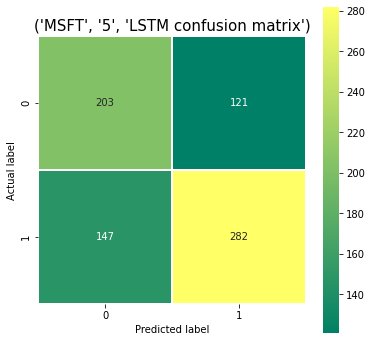

The accuracy of the model is: 64.41 %
The f1 value for the model is: 67.79 %
1007
Epoch 1/50
56/56 - 2s - loss: 0.0810 - val_loss: 0.6684
Epoch 2/50
56/56 - 0s - loss: 0.0881 - val_loss: 0.1728
Epoch 3/50
56/56 - 0s - loss: 0.0360 - val_loss: 0.0840
Epoch 4/50
56/56 - 0s - loss: 0.0086 - val_loss: 0.1103
Epoch 5/50
56/56 - 0s - loss: 0.0102 - val_loss: 0.0933
Epoch 6/50
56/56 - 0s - loss: 0.0079 - val_loss: 0.1228
Epoch 7/50
56/56 - 0s - loss: 0.0104 - val_loss: 0.1212
Epoch 8/50
56/56 - 0s - loss: 0.0073 - val_loss: 0.1332
Epoch 9/50
56/56 - 0s - loss: 0.0080 - val_loss: 0.1612
Epoch 10/50
56/56 - 0s - loss: 0.0105 - val_loss: 0.1625
Epoch 11/50
56/56 - 0s - loss: 0.0071 - val_loss: 0.1953
Epoch 12/50
56/56 - 0s - loss: 0.0078 - val_loss: 0.2103
Epoch 13/50
56/56 - 0s - loss: 0.0081 - val_loss: 0.2265
Epoch 14/50
56/56 - 0s - loss: 0.0084 - val_loss: 0.2391
Epoch 15/50
56/56 - 0s - loss: 0.0080 - val_loss: 0.2532
Epoch 16/50
56/56 - 0s - loss: 0.0075 - val_loss: 0.2563
Epoch 17/50
56/

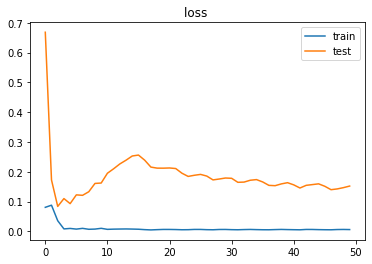

Test RMSE: 20.211


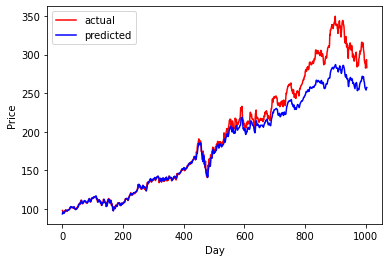

1004
1004


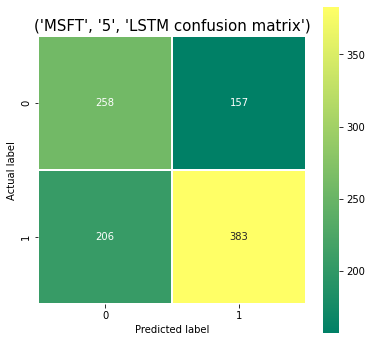

The accuracy of the model is: 63.84 %
The f1 value for the model is: 67.85 %
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
BP
252
Epoch 1/50
14/14 - 2s - loss: 0.6010 - val_loss: 0.2867
Epoch 2/50
14/14 - 0s - loss: 0.4187 - val_loss: 0.1330
Epoch 3/50
14/14 - 0s - loss: 0.2521 - val_loss: 0.0474
Epoch 4/50
14/14 - 0s - loss: 0.1100 - val_loss: 0.1615
Epoch 5/50
14/14 - 0s - loss: 0.0682 - val_loss: 0.0545
Epoch 6/50
14/14 - 0s - loss: 0.0982 - val_loss: 0.0970
Epoch 7/50
14/14 - 0s - loss: 0.0566 - val_loss: 0.0728
Epoch 8/50
14/14 - 0s - loss: 0.0606 - val_loss: 0.0779
Epoch 9/50
14/14 - 0s - loss: 0.0455 - val_loss: 0.0533
Epoch 10/50
14/14 - 0s - loss: 0.0447 - val_loss: 0.0541
Epoch 11/50
14/14 - 0s - loss: 0.0336 - val_loss: 0.0320
Epoch 12/50
14/14 - 0s

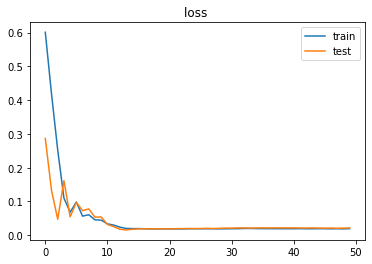

Test RMSE: 0.843


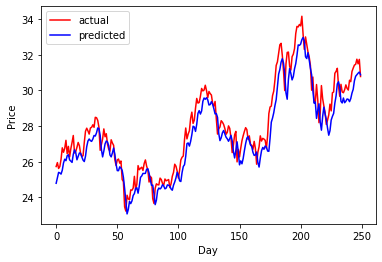

249
249


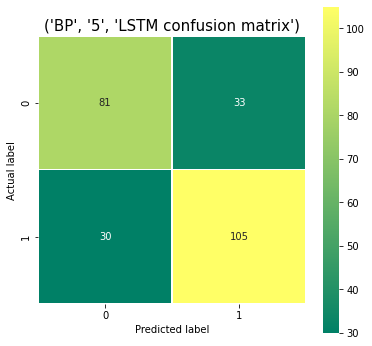

The accuracy of the model is: 74.70 %
The f1 value for the model is: 76.92 %
504
Epoch 1/50
28/28 - 2s - loss: 0.4321 - val_loss: 0.0549
Epoch 2/50
28/28 - 0s - loss: 0.1055 - val_loss: 0.1325
Epoch 3/50
28/28 - 0s - loss: 0.0547 - val_loss: 0.1266
Epoch 4/50
28/28 - 0s - loss: 0.0465 - val_loss: 0.1063
Epoch 5/50
28/28 - 0s - loss: 0.0424 - val_loss: 0.0927
Epoch 6/50
28/28 - 0s - loss: 0.0361 - val_loss: 0.0815
Epoch 7/50
28/28 - 0s - loss: 0.0290 - val_loss: 0.0740
Epoch 8/50
28/28 - 0s - loss: 0.0233 - val_loss: 0.0729
Epoch 9/50
28/28 - 0s - loss: 0.0211 - val_loss: 0.0635
Epoch 10/50
28/28 - 0s - loss: 0.0179 - val_loss: 0.0533
Epoch 11/50
28/28 - 0s - loss: 0.0158 - val_loss: 0.0426
Epoch 12/50
28/28 - 0s - loss: 0.0141 - val_loss: 0.0346
Epoch 13/50
28/28 - 0s - loss: 0.0141 - val_loss: 0.0335
Epoch 14/50
28/28 - 0s - loss: 0.0151 - val_loss: 0.0368
Epoch 15/50
28/28 - 0s - loss: 0.0158 - val_loss: 0.0414
Epoch 16/50
28/28 - 0s - loss: 0.0153 - val_loss: 0.0419
Epoch 17/50
28/2

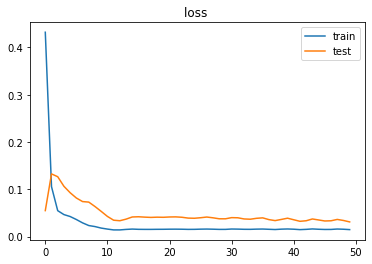

Test RMSE: 1.316


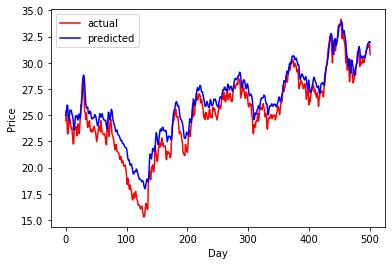

501
501


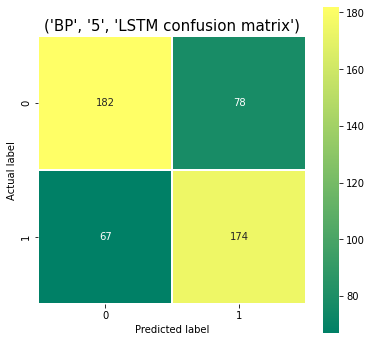

The accuracy of the model is: 71.06 %
The f1 value for the model is: 70.59 %
756
Epoch 1/50
42/42 - 3s - loss: 0.2633 - val_loss: 0.1491
Epoch 2/50
42/42 - 0s - loss: 0.1110 - val_loss: 0.1336
Epoch 3/50
42/42 - 0s - loss: 0.0853 - val_loss: 0.1012
Epoch 4/50
42/42 - 0s - loss: 0.0661 - val_loss: 0.0679
Epoch 5/50
42/42 - 0s - loss: 0.0488 - val_loss: 0.0461
Epoch 6/50
42/42 - 0s - loss: 0.0252 - val_loss: 0.0331
Epoch 7/50
42/42 - 0s - loss: 0.0197 - val_loss: 0.0358
Epoch 8/50
42/42 - 0s - loss: 0.0160 - val_loss: 0.0322
Epoch 9/50
42/42 - 0s - loss: 0.0151 - val_loss: 0.0286
Epoch 10/50
42/42 - 0s - loss: 0.0170 - val_loss: 0.0309
Epoch 11/50
42/42 - 0s - loss: 0.0156 - val_loss: 0.0274
Epoch 12/50
42/42 - 0s - loss: 0.0142 - val_loss: 0.0243
Epoch 13/50
42/42 - 0s - loss: 0.0150 - val_loss: 0.0239
Epoch 14/50
42/42 - 0s - loss: 0.0147 - val_loss: 0.0226
Epoch 15/50
42/42 - 0s - loss: 0.0141 - val_loss: 0.0204
Epoch 16/50
42/42 - 0s - loss: 0.0135 - val_loss: 0.0189
Epoch 17/50
42/4

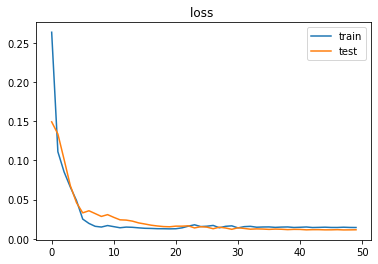

Test RMSE: 0.817


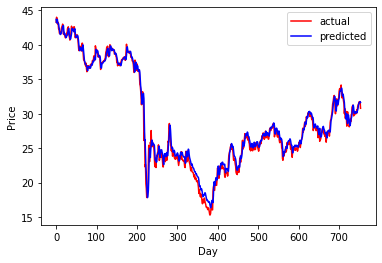

753
753


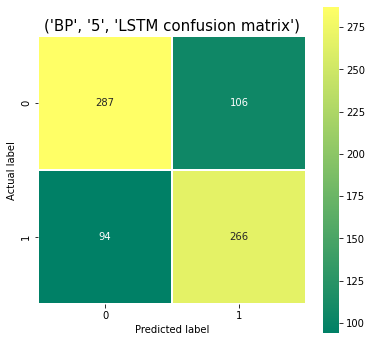

The accuracy of the model is: 73.44 %
The f1 value for the model is: 72.68 %
1007
Epoch 1/50
56/56 - 4s - loss: 0.2495 - val_loss: 0.1145
Epoch 2/50
56/56 - 0s - loss: 0.0995 - val_loss: 0.0762
Epoch 3/50
56/56 - 0s - loss: 0.0774 - val_loss: 0.0519
Epoch 4/50
56/56 - 0s - loss: 0.0329 - val_loss: 0.0441
Epoch 5/50
56/56 - 0s - loss: 0.0212 - val_loss: 0.0366
Epoch 6/50
56/56 - 0s - loss: 0.0194 - val_loss: 0.0300
Epoch 7/50
56/56 - 0s - loss: 0.0167 - val_loss: 0.0244
Epoch 8/50
56/56 - 0s - loss: 0.0152 - val_loss: 0.0208
Epoch 9/50
56/56 - 0s - loss: 0.0150 - val_loss: 0.0194
Epoch 10/50
56/56 - 0s - loss: 0.0145 - val_loss: 0.0192
Epoch 11/50
56/56 - 0s - loss: 0.0144 - val_loss: 0.0191
Epoch 12/50
56/56 - 0s - loss: 0.0144 - val_loss: 0.0191
Epoch 13/50
56/56 - 0s - loss: 0.0144 - val_loss: 0.0191
Epoch 14/50
56/56 - 0s - loss: 0.0143 - val_loss: 0.0192
Epoch 15/50
56/56 - 0s - loss: 0.0144 - val_loss: 0.0193
Epoch 16/50
56/56 - 0s - loss: 0.0144 - val_loss: 0.0193
Epoch 17/50
56/

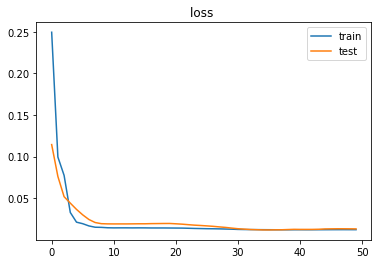

Test RMSE: 0.892


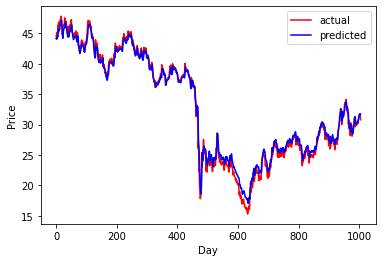

1004
1004


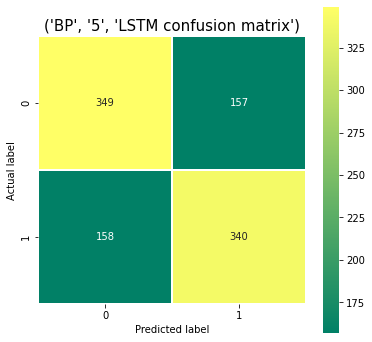

The accuracy of the model is: 68.63 %
The f1 value for the model is: 68.34 %
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
DIS
252
Epoch 1/50
14/14 - 2s - loss: 0.2110 - val_loss: 0.3692
Epoch 2/50
14/14 - 0s - loss: 0.0805 - val_loss: 0.1621
Epoch 3/50
14/14 - 0s - loss: 0.0693 - val_loss: 0.0876
Epoch 4/50
14/14 - 0s - loss: 0.0711 - val_loss: 0.0895
Epoch 5/50
14/14 - 0s - loss: 0.0594 - val_loss: 0.0842
Epoch 6/50
14/14 - 0s - loss: 0.0457 - val_loss: 0.0550
Epoch 7/50
14/14 - 0s - loss: 0.0355 - val_loss: 0.0302
Epoch 8/50
14/14 - 0s - loss: 0.0265 - val_loss: 0.0200
Epoch 9/50
14/14 - 0s - loss: 0.0193 - val_loss: 0.0222
Epoch 10/50
14/14 - 0s - loss: 0.0172 - val_loss: 0.0289
Epoch 11/50
14/14 - 0s - loss: 0.0168 - val_loss: 0.0266
Epoch 12/50
14/14 - 0

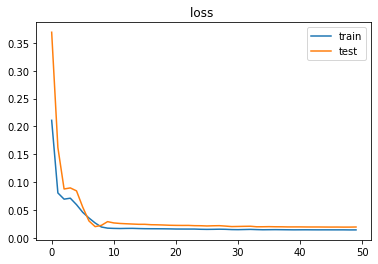

Test RMSE: 3.013


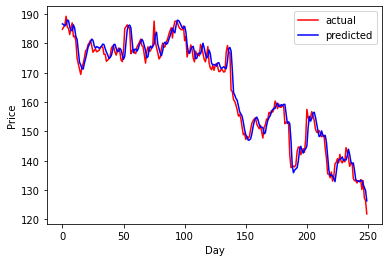

249
249


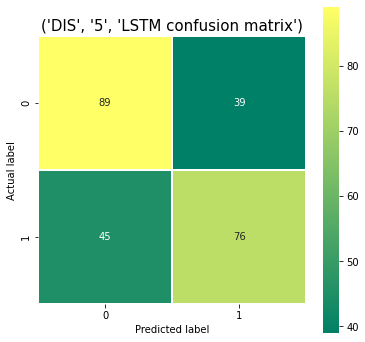

The accuracy of the model is: 66.27 %
The f1 value for the model is: 64.41 %
504
Epoch 1/50
28/28 - 2s - loss: 0.3065 - val_loss: 0.4220
Epoch 2/50
28/28 - 0s - loss: 0.0467 - val_loss: 0.0713
Epoch 3/50
28/28 - 0s - loss: 0.0534 - val_loss: 0.0281
Epoch 4/50
28/28 - 0s - loss: 0.0678 - val_loss: 0.0242
Epoch 5/50
28/28 - 0s - loss: 0.0523 - val_loss: 0.0356
Epoch 6/50
28/28 - 0s - loss: 0.0331 - val_loss: 0.0289
Epoch 7/50
28/28 - 0s - loss: 0.0253 - val_loss: 0.0273
Epoch 8/50
28/28 - 0s - loss: 0.0233 - val_loss: 0.0261
Epoch 9/50
28/28 - 0s - loss: 0.0200 - val_loss: 0.0267
Epoch 10/50
28/28 - 0s - loss: 0.0178 - val_loss: 0.0289
Epoch 11/50
28/28 - 0s - loss: 0.0170 - val_loss: 0.0297
Epoch 12/50
28/28 - 0s - loss: 0.0157 - val_loss: 0.0303
Epoch 13/50
28/28 - 0s - loss: 0.0159 - val_loss: 0.0285
Epoch 14/50
28/28 - 0s - loss: 0.0154 - val_loss: 0.0289
Epoch 15/50
28/28 - 0s - loss: 0.0147 - val_loss: 0.0281
Epoch 16/50
28/28 - 0s - loss: 0.0147 - val_loss: 0.0278
Epoch 17/50
28/2

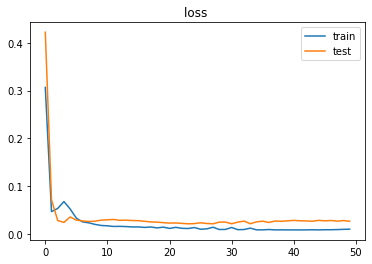

Test RMSE: 4.080


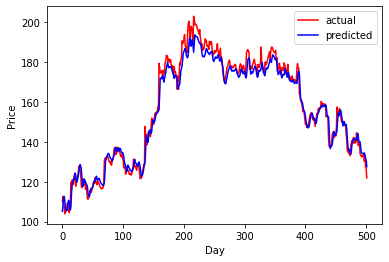

501
501


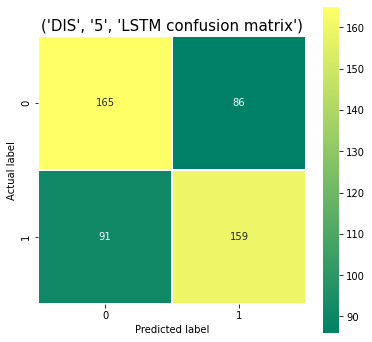

The accuracy of the model is: 64.67 %
The f1 value for the model is: 64.24 %
756
Epoch 1/50
42/42 - 3s - loss: 0.1523 - val_loss: 0.0435
Epoch 2/50
42/42 - 0s - loss: 0.1208 - val_loss: 0.0269
Epoch 3/50
42/42 - 0s - loss: 0.0696 - val_loss: 0.0390
Epoch 4/50
42/42 - 0s - loss: 0.0470 - val_loss: 0.0203
Epoch 5/50
42/42 - 0s - loss: 0.0343 - val_loss: 0.0387
Epoch 6/50
42/42 - 0s - loss: 0.0321 - val_loss: 0.0430
Epoch 7/50
42/42 - 0s - loss: 0.0282 - val_loss: 0.0446
Epoch 8/50
42/42 - 0s - loss: 0.0245 - val_loss: 0.0405
Epoch 9/50
42/42 - 0s - loss: 0.0180 - val_loss: 0.0194
Epoch 10/50
42/42 - 0s - loss: 0.0140 - val_loss: 0.0188
Epoch 11/50
42/42 - 0s - loss: 0.0121 - val_loss: 0.0235
Epoch 12/50
42/42 - 0s - loss: 0.0170 - val_loss: 0.0220
Epoch 13/50
42/42 - 0s - loss: 0.0159 - val_loss: 0.0214
Epoch 14/50
42/42 - 0s - loss: 0.0098 - val_loss: 0.0289
Epoch 15/50
42/42 - 0s - loss: 0.0120 - val_loss: 0.0303
Epoch 16/50
42/42 - 0s - loss: 0.0102 - val_loss: 0.0313
Epoch 17/50
42/4

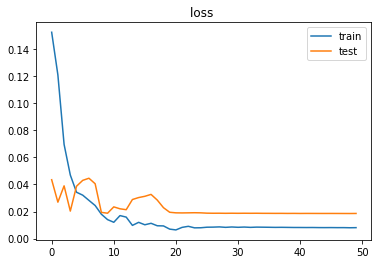

Test RMSE: 3.290


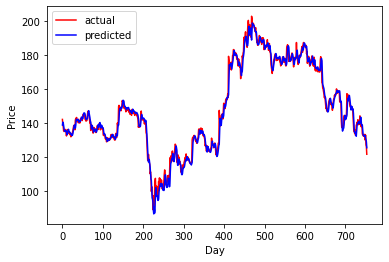

753
753


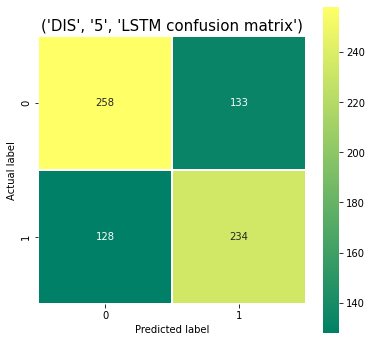

The accuracy of the model is: 65.34 %
The f1 value for the model is: 64.20 %
1007
Epoch 1/50
56/56 - 2s - loss: 0.0603 - val_loss: 0.0525
Epoch 2/50
56/56 - 0s - loss: 0.1200 - val_loss: 0.0346
Epoch 3/50
56/56 - 0s - loss: 0.0724 - val_loss: 0.0236
Epoch 4/50
56/56 - 0s - loss: 0.0125 - val_loss: 0.0223
Epoch 5/50
56/56 - 0s - loss: 0.0103 - val_loss: 0.0183
Epoch 6/50
56/56 - 0s - loss: 0.0123 - val_loss: 0.0199
Epoch 7/50
56/56 - 0s - loss: 0.0121 - val_loss: 0.0221
Epoch 8/50
56/56 - 0s - loss: 0.0108 - val_loss: 0.0207
Epoch 9/50
56/56 - 0s - loss: 0.0079 - val_loss: 0.0184
Epoch 10/50
56/56 - 0s - loss: 0.0058 - val_loss: 0.0193
Epoch 11/50
56/56 - 0s - loss: 0.0062 - val_loss: 0.0186
Epoch 12/50
56/56 - 0s - loss: 0.0057 - val_loss: 0.0196
Epoch 13/50
56/56 - 0s - loss: 0.0065 - val_loss: 0.0191
Epoch 14/50
56/56 - 0s - loss: 0.0058 - val_loss: 0.0195
Epoch 15/50
56/56 - 0s - loss: 0.0065 - val_loss: 0.0185
Epoch 16/50
56/56 - 0s - loss: 0.0059 - val_loss: 0.0208
Epoch 17/50
56/

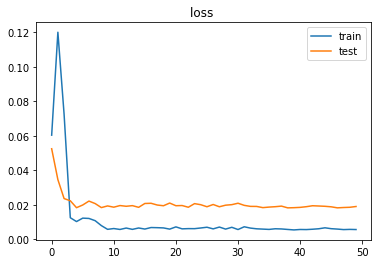

Test RMSE: 3.017


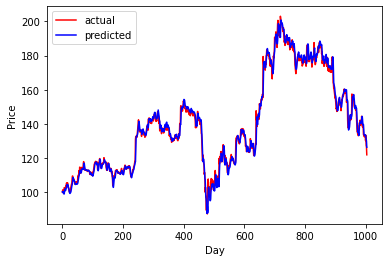

1004
1004


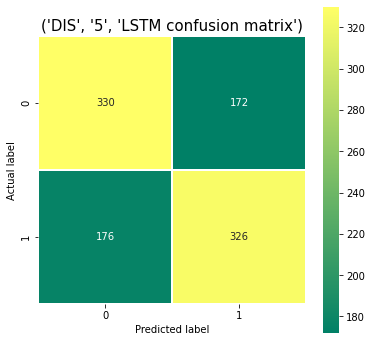

The accuracy of the model is: 65.34 %
The f1 value for the model is: 65.20 %
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
LMT
252
Epoch 1/50
14/14 - 2s - loss: 0.4148 - val_loss: 0.5021
Epoch 2/50
14/14 - 0s - loss: 0.2576 - val_loss: 0.2905
Epoch 3/50
14/14 - 0s - loss: 0.0927 - val_loss: 0.0655
Epoch 4/50
14/14 - 0s - loss: 0.0749 - val_loss: 0.0485
Epoch 5/50
14/14 - 0s - loss: 0.0806 - val_loss: 0.0572
Epoch 6/50
14/14 - 0s - loss: 0.0633 - val_loss: 0.0421
Epoch 7/50
14/14 - 0s - loss: 0.0571 - val_loss: 0.0339
Epoch 8/50
14/14 - 0s - loss: 0.0512 - val_loss: 0.0292
Epoch 9/50
14/14 - 0s - loss: 0.0433 - val_loss: 0.0248
Epoch 10/50
14/14 - 0s - loss: 0.0366 - val_loss: 0.0224
Epoch 11/50
14/14 - 0s - loss: 0.0304 - val_loss: 0.0221
Epoch 12/50
14/14 - 0

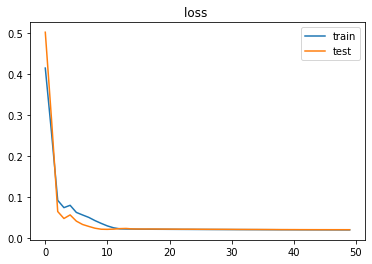

Test RMSE: 6.467


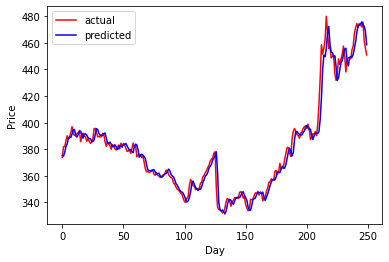

249
249


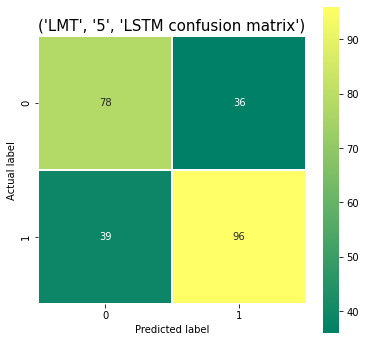

The accuracy of the model is: 69.88 %
The f1 value for the model is: 71.91 %
504
Epoch 1/50
28/28 - 2s - loss: 0.2371 - val_loss: 0.2801
Epoch 2/50
28/28 - 0s - loss: 0.0584 - val_loss: 0.0460
Epoch 3/50
28/28 - 0s - loss: 0.0928 - val_loss: 0.0142
Epoch 4/50
28/28 - 0s - loss: 0.0539 - val_loss: 0.0235
Epoch 5/50
28/28 - 0s - loss: 0.0218 - val_loss: 0.0184
Epoch 6/50
28/28 - 0s - loss: 0.0200 - val_loss: 0.0162
Epoch 7/50
28/28 - 0s - loss: 0.0160 - val_loss: 0.0129
Epoch 8/50
28/28 - 0s - loss: 0.0143 - val_loss: 0.0134
Epoch 9/50
28/28 - 0s - loss: 0.0132 - val_loss: 0.0142
Epoch 10/50
28/28 - 0s - loss: 0.0115 - val_loss: 0.0144
Epoch 11/50
28/28 - 0s - loss: 0.0121 - val_loss: 0.0149
Epoch 12/50
28/28 - 0s - loss: 0.0117 - val_loss: 0.0138
Epoch 13/50
28/28 - 0s - loss: 0.0126 - val_loss: 0.0146
Epoch 14/50
28/28 - 0s - loss: 0.0107 - val_loss: 0.0142
Epoch 15/50
28/28 - 0s - loss: 0.0092 - val_loss: 0.0126
Epoch 16/50
28/28 - 0s - loss: 0.0147 - val_loss: 0.0132
Epoch 17/50
28/2

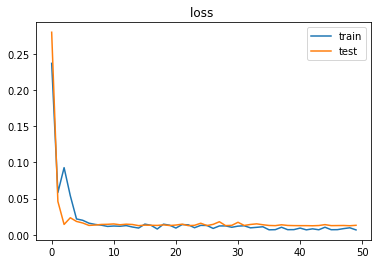

Test RMSE: 6.596


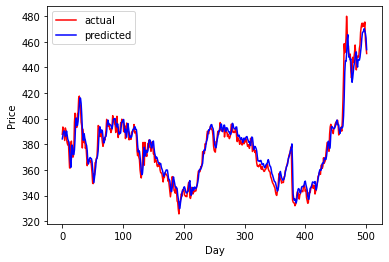

501
501


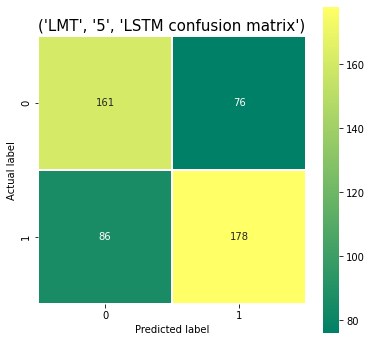

The accuracy of the model is: 67.66 %
The f1 value for the model is: 68.73 %
756
Epoch 1/50
42/42 - 3s - loss: 0.1398 - val_loss: 0.2216
Epoch 2/50
42/42 - 0s - loss: 0.1051 - val_loss: 0.0481
Epoch 3/50
42/42 - 0s - loss: 0.0516 - val_loss: 0.0310
Epoch 4/50
42/42 - 0s - loss: 0.0129 - val_loss: 0.0156
Epoch 5/50
42/42 - 0s - loss: 0.0241 - val_loss: 0.0257
Epoch 6/50
42/42 - 0s - loss: 0.0087 - val_loss: 0.0182
Epoch 7/50
42/42 - 0s - loss: 0.0074 - val_loss: 0.0155
Epoch 8/50
42/42 - 0s - loss: 0.0198 - val_loss: 0.0318
Epoch 9/50
42/42 - 0s - loss: 0.0234 - val_loss: 0.0358
Epoch 10/50
42/42 - 0s - loss: 0.0142 - val_loss: 0.0161
Epoch 11/50
42/42 - 0s - loss: 0.0189 - val_loss: 0.0153
Epoch 12/50
42/42 - 0s - loss: 0.0068 - val_loss: 0.0153
Epoch 13/50
42/42 - 0s - loss: 0.0083 - val_loss: 0.0154
Epoch 14/50
42/42 - 0s - loss: 0.0082 - val_loss: 0.0153
Epoch 15/50
42/42 - 0s - loss: 0.0081 - val_loss: 0.0152
Epoch 16/50
42/42 - 0s - loss: 0.0078 - val_loss: 0.0152
Epoch 17/50
42/4

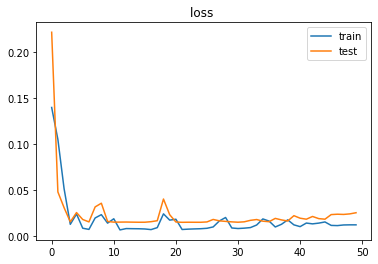

Test RMSE: 10.139


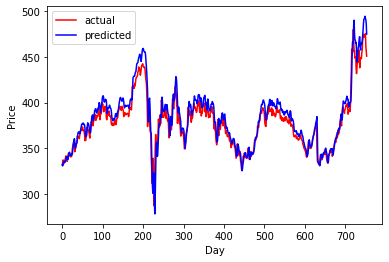

753
753


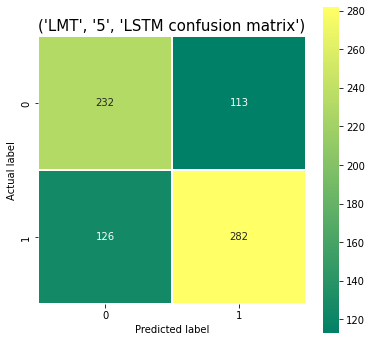

The accuracy of the model is: 68.26 %
The f1 value for the model is: 70.24 %
1007
Epoch 1/50
56/56 - 2s - loss: 0.0813 - val_loss: 0.1566
Epoch 2/50
56/56 - 0s - loss: 0.0935 - val_loss: 0.0650
Epoch 3/50
56/56 - 0s - loss: 0.0190 - val_loss: 0.0157
Epoch 4/50
56/56 - 0s - loss: 0.0155 - val_loss: 0.0230
Epoch 5/50
56/56 - 0s - loss: 0.0109 - val_loss: 0.0181
Epoch 6/50
56/56 - 0s - loss: 0.0091 - val_loss: 0.0224
Epoch 7/50
56/56 - 0s - loss: 0.0099 - val_loss: 0.0183
Epoch 8/50
56/56 - 0s - loss: 0.0124 - val_loss: 0.0267
Epoch 9/50
56/56 - 0s - loss: 0.0112 - val_loss: 0.0144
Epoch 10/50
56/56 - 0s - loss: 0.0089 - val_loss: 0.0181
Epoch 11/50
56/56 - 0s - loss: 0.0115 - val_loss: 0.0184
Epoch 12/50
56/56 - 0s - loss: 0.0198 - val_loss: 0.0310
Epoch 13/50
56/56 - 0s - loss: 0.0136 - val_loss: 0.0171
Epoch 14/50
56/56 - 0s - loss: 0.0096 - val_loss: 0.0184
Epoch 15/50
56/56 - 0s - loss: 0.0160 - val_loss: 0.0248
Epoch 16/50
56/56 - 0s - loss: 0.0117 - val_loss: 0.0151
Epoch 17/50
56/

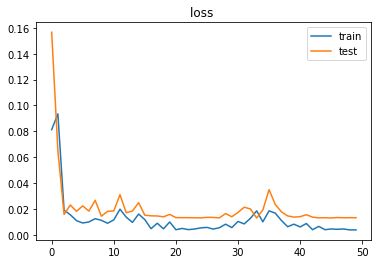

Test RMSE: 6.490


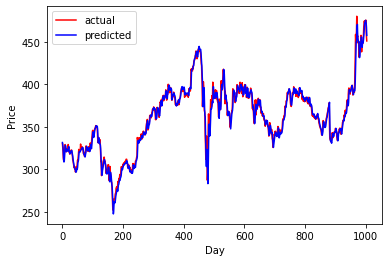

1004
1004


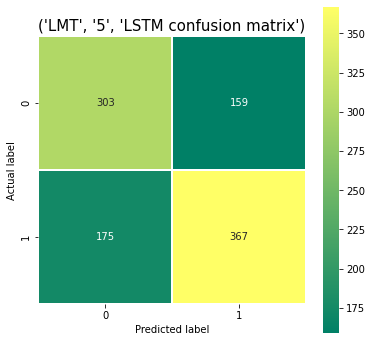

The accuracy of the model is: 66.73 %
The f1 value for the model is: 68.73 %
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
BTC-USD
365
Epoch 1/50
21/21 - 2s - loss: 0.0813 - val_loss: 0.3811
Epoch 2/50
21/21 - 0s - loss: 0.0719 - val_loss: 0.3367
Epoch 3/50
21/21 - 0s - loss: 0.0512 - val_loss: 0.2634
Epoch 4/50
21/21 - 0s - loss: 0.0404 - val_loss: 0.1766
Epoch 5/50
21/21 - 0s - loss: 0.0254 - val_loss: 0.0651
Epoch 6/50
21/21 - 0s - loss: 0.0158 - val_loss: 0.0333
Epoch 7/50
21/21 - 0s - loss: 0.0081 - val_loss: 0.0260
Epoch 8/50
21/21 - 0s - loss: 0.0121 - val_loss: 0.0217
Epoch 9/50
21/21 - 0s - loss: 0.0148 - val_loss: 0.0233
Epoch 10/50
21/21 - 0s - loss: 0.0113 - val_loss: 0.0273
Epoch 11/50
21/21 - 0s - loss: 0.0121 - val_loss: 0.0218
Epoch 12/50
21/21

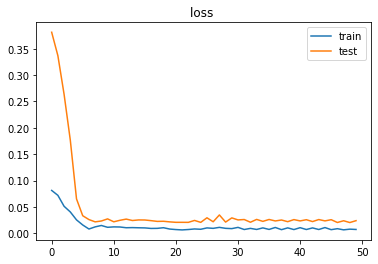

Test RMSE: 1884.770


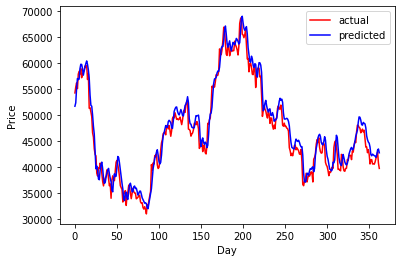

362
362


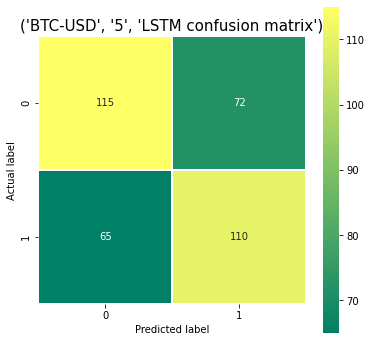

The accuracy of the model is: 62.15 %
The f1 value for the model is: 61.62 %
555
Epoch 1/50
31/31 - 2s - loss: 0.1415 - val_loss: 1.2838
Epoch 2/50
31/31 - 0s - loss: 0.0810 - val_loss: 0.3828
Epoch 3/50
31/31 - 0s - loss: 0.0725 - val_loss: 0.1752
Epoch 4/50
31/31 - 0s - loss: 0.0239 - val_loss: 0.1807
Epoch 5/50
31/31 - 0s - loss: 0.0142 - val_loss: 0.0883
Epoch 6/50
31/31 - 0s - loss: 0.0266 - val_loss: 0.0915
Epoch 7/50
31/31 - 0s - loss: 0.0246 - val_loss: 0.0850
Epoch 8/50
31/31 - 0s - loss: 0.0229 - val_loss: 0.0905
Epoch 9/50
31/31 - 0s - loss: 0.0233 - val_loss: 0.1074
Epoch 10/50
31/31 - 0s - loss: 0.0230 - val_loss: 0.1242
Epoch 11/50
31/31 - 0s - loss: 0.0209 - val_loss: 0.1568
Epoch 12/50
31/31 - 0s - loss: 0.0192 - val_loss: 0.1996
Epoch 13/50
31/31 - 0s - loss: 0.0218 - val_loss: 0.1945
Epoch 14/50
31/31 - 0s - loss: 0.0206 - val_loss: 0.2083
Epoch 15/50
31/31 - 0s - loss: 0.0165 - val_loss: 0.2850
Epoch 16/50
31/31 - 0s - loss: 0.0217 - val_loss: 0.2541
Epoch 17/50
31/3

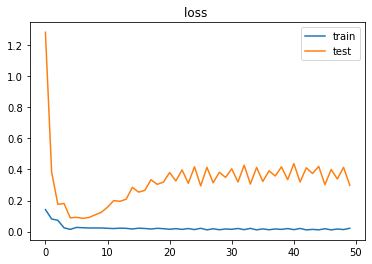

Test RMSE: 7326.678


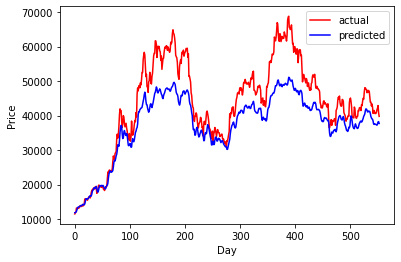

552
552


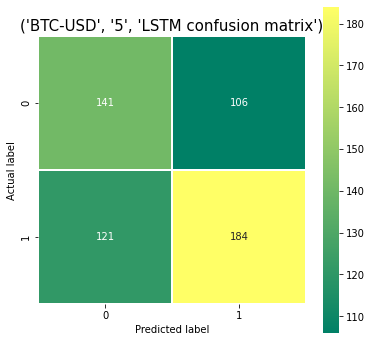

The accuracy of the model is: 58.88 %
The f1 value for the model is: 61.85 %
555
Epoch 1/50
31/31 - 2s - loss: 0.1680 - val_loss: 1.4747
Epoch 2/50
31/31 - 0s - loss: 0.1018 - val_loss: 0.5744
Epoch 3/50
31/31 - 0s - loss: 0.0678 - val_loss: 0.0842
Epoch 4/50
31/31 - 0s - loss: 0.0331 - val_loss: 0.2369
Epoch 5/50
31/31 - 0s - loss: 0.0107 - val_loss: 0.0885
Epoch 6/50
31/31 - 0s - loss: 0.0269 - val_loss: 0.2322
Epoch 7/50
31/31 - 0s - loss: 0.0190 - val_loss: 0.0886
Epoch 8/50
31/31 - 0s - loss: 0.0297 - val_loss: 0.1292
Epoch 9/50
31/31 - 0s - loss: 0.0238 - val_loss: 0.1360
Epoch 10/50
31/31 - 0s - loss: 0.0132 - val_loss: 0.1082
Epoch 11/50
31/31 - 0s - loss: 0.0259 - val_loss: 0.0947
Epoch 12/50
31/31 - 0s - loss: 0.0193 - val_loss: 0.0918
Epoch 13/50
31/31 - 0s - loss: 0.0188 - val_loss: 0.1219
Epoch 14/50
31/31 - 0s - loss: 0.0254 - val_loss: 0.1024
Epoch 15/50
31/31 - 0s - loss: 0.0170 - val_loss: 0.1284
Epoch 16/50
31/31 - 0s - loss: 0.0156 - val_loss: 0.2065
Epoch 17/50
31/3

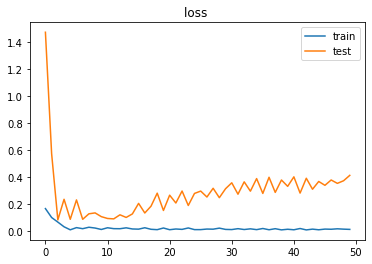

Test RMSE: 9638.377


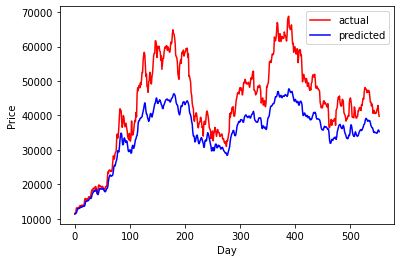

552
552


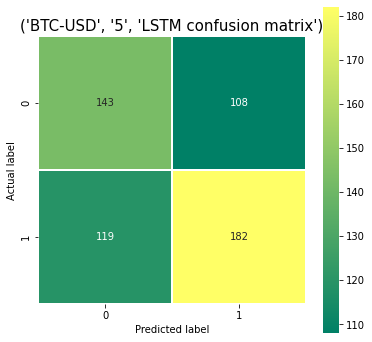

The accuracy of the model is: 58.88 %
The f1 value for the model is: 61.59 %
555
Epoch 1/50
31/31 - 2s - loss: 0.1530 - val_loss: 1.3291
Epoch 2/50
31/31 - 0s - loss: 0.0862 - val_loss: 0.3950
Epoch 3/50
31/31 - 0s - loss: 0.0747 - val_loss: 0.1804
Epoch 4/50
31/31 - 0s - loss: 0.0270 - val_loss: 0.1670
Epoch 5/50
31/31 - 0s - loss: 0.0147 - val_loss: 0.0824
Epoch 6/50
31/31 - 0s - loss: 0.0290 - val_loss: 0.0986
Epoch 7/50
31/31 - 0s - loss: 0.0252 - val_loss: 0.1101
Epoch 8/50
31/31 - 0s - loss: 0.0147 - val_loss: 0.1244
Epoch 9/50
31/31 - 0s - loss: 0.0249 - val_loss: 0.0991
Epoch 10/50
31/31 - 0s - loss: 0.0250 - val_loss: 0.0987
Epoch 11/50
31/31 - 0s - loss: 0.0147 - val_loss: 0.1743
Epoch 12/50
31/31 - 0s - loss: 0.0228 - val_loss: 0.1480
Epoch 13/50
31/31 - 0s - loss: 0.0234 - val_loss: 0.1482
Epoch 14/50
31/31 - 0s - loss: 0.0165 - val_loss: 0.2209
Epoch 15/50
31/31 - 0s - loss: 0.0195 - val_loss: 0.2369
Epoch 16/50
31/31 - 0s - loss: 0.0215 - val_loss: 0.2280
Epoch 17/50
31/3

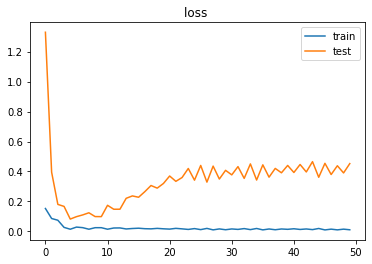

Test RMSE: 10449.360


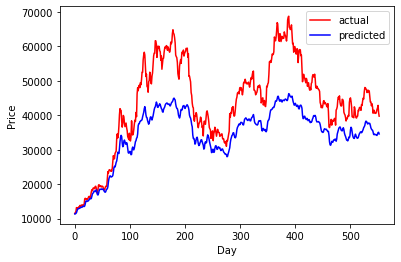

552
552


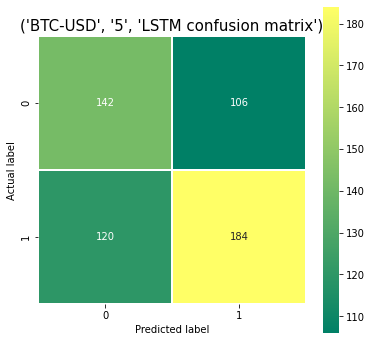

The accuracy of the model is: 59.06 %
The f1 value for the model is: 61.95 %


In [3]:
Tickers = ["MSFT","BP","DIS","LMT","BTC-USD"]
for tick in Tickers:
    stock5 = yf.download([tick],period = "5y")
    stock10 = yf.download([tick],period = "10y")
    stock15 = yf.download([tick],period = "15y")
    stock20 = yf.download([tick],period = "20y")
    
    years = [stock5,stock10,stock15,stock20]
    print(tick)
    for stock in years:
        yearsused = 5
        ratio = round(0.8*stock.shape[0])
        values = stock.iloc[:, 1:3].values
        train = values[:ratio]
        test = values[ratio:]
        print(len(test))
        # normalize features
        scaler = MinMaxScaler(feature_range=(0, 1))
        train_scaled = scaler.fit_transform(train)

        lags = 2
        features = train_scaled.shape[1]
        #print(lags, features)

        # frame as supervised learning
        train_reframed = series_to_supervised(train_scaled, lags, 1)
        #print(train_reframed)
        # drop columns we don't want to predict
        train_reframed.drop(train_reframed.columns[[-1]], axis=1, inplace=True)

        test_scaled = scaler.transform(test)
        test_reframed = series_to_supervised(test_scaled, lags, 1)
        test_reframed.drop(test_reframed.columns[[-1]], axis=1, inplace=True)

#         print(train_reframed.head())
#         print(test_reframed.head())
        
        values_train = train_reframed.values
        values_test = test_reframed.values

        train_X, train_y = values_train[:, :-1], values_train[:, -1]
        test_X, test_y = values_test[:, :-1], values_test[:, -1]
        #print(train_X.shape, test_X.shape)
        # reshape input to be 3D [samples, timesteps, features]
        train_X = train_X.reshape((train_X.shape[0], 2, features))
        test_X = test_X.reshape((test_X.shape[0], 2, features))
        #train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
        #test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
        #print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
        

        model = Sequential()
        model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
        model.add(Dense(1))
        model.compile(loss="mae",optimizer = "adam")
        lstm = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
        plt.plot(lstm.history['loss'], label='train')
        plt.plot(lstm.history['val_loss'], label='test')
        plt.title('loss ')
        plt.legend()
        plt.show()
        yhat = model.predict(test_X)

        # invert scaling for forecast
        inv_yhat = concatenate((yhat, yhat), axis=1)
        #inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)

        inv_yhat = scaler.inverse_transform(inv_yhat)
        inv_yhat = inv_yhat[:,0]
        # invert scaling for actual
        test_y = test_y.reshape((len(test_y), 1))
        inv_y = concatenate((test_y, test_y), axis=1)
        inv_y = scaler.inverse_transform(inv_y)
        inv_y = inv_y[:,0]
        # calculate RMSE
        rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
        print('Test RMSE: %.3f' % rmse)
                
        plt.plot(inv_y, color = 'red', label = 'actual')
        plt.plot(inv_yhat, color = 'blue', label = 'predicted')
        plt.xlabel('Day')
        plt.ylabel('Price')
        plt.legend()
        plt.show()
        
        changing = stock[ratio:]
        Open = changing["Open"]
        CHANGE = np.array([])

        for i in range(0,len(Open)-1):    
            if Open[i]<Open[i+1]:
                CHANGE = np.append(CHANGE, 1)
            else:
                CHANGE = np.append(CHANGE, 0)
        CHANGE = CHANGE[:-2]
        
        
        predchange = np.array([])
        for i in range(0,len(inv_yhat)-1):    
            if inv_yhat[i]<inv_yhat[i+1]:
                predchange = np.append(predchange, 1)
            else:
                predchange = np.append(predchange, 0)    
        
        print(len(predchange))
        print(len(CHANGE))
        
        
        cm_lstm = metrics.confusion_matrix(predchange,CHANGE)
        plt.figure(figsize=(6,6))
        sns.heatmap(cm_lstm,annot=True,fmt="d",linewidths=.5,square=True,cmap="summer")
        plt.ylabel("Actual label")
        plt.xlabel("Predicted label")
        all_sample_title=(tick,str(yearsused),"LSTM confusion matrix")
        plt.title(all_sample_title,size=15)
        plt.show()
        
        yearsused = yearsused + 5
        
        print('The accuracy of the model is: {:.2f}'.format(accuracy_score(CHANGE, predchange)*100),"%")
        print('The f1 value for the model is: {:.2f}'.format(f1_score(CHANGE,predchange,pos_label=1.0)*100),'%')